In [8]:
import os
import sys
from IPython.display import display, HTML , Markdown
import unicodedata
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
from math import ceil
from sklearn.utils import shuffle

In [9]:
# Single number encoding
def labelarg(tensor):
    lab = []
    for i in range(len(tensor)):
        lab.append(np.argmax(np.array(tensor)[i]))
    return torch.tensor(lab)

# Not used data augmentation function
def augment(labels , images , y , lab , vol = 10 , d1 = 98 , d2 = 40):
    
    i = y
    
    while i < len(labels):

        a = np.random.randint(0,2)
        noise = torch.rand((d1,d2))
        volume = torch.full((d1,d2),vol)
        
        b = torch.div(noise , volume)

        labels[i] = lab#labels[i].item()
        img = images[i-y,0,:,:]#y-i,0,:,:]

        if a == 1:
            images[i,0,:,:] = img - b
        else:
            images[i,0,:,:] = img + b

        i += 1
    return labels , images

# Function for train-test splitting
def train_test(LAB , IMG , split = 0.2 , n = 14):
    
    tilps = 1 - split
    
    train_lab = torch.empty((int(len(LAB[0])*tilps*n)) , dtype = int)
    train_img = torch.empty((int(len(LAB[0])*tilps*n) , 1 , 98 , 40))
    
    test_lab = torch.empty((int(len(LAB[0])*split*n)) , dtype = int)
    test_img = torch.empty((int(len(LAB[0])*split*n) , 1 , 98 , 40))
    
    for j in range(n):
        
        lab = LAB[j]
        img = IMG[j]
        
        g = len(LAB[j])
    
        i = 0
        i0_train = int(j*g*0.8)
        i0_test = int(j*g*0.2)
        
        while i < g:
            
            etichetta = lab[i].item()
            immagine = img[i,0,:,:]

            if i < g*tilps:
                
                k = i + i0_train
                
                train_lab[k] = etichetta
                train_img[k,0,:,:] = immagine
                
            else:
                
                k = i + i0_test - int(g*tilps)
                
                test_lab[k] = etichetta
                test_img[k,0,:,:] = immagine

            i += 1
            
    return train_lab , train_img , test_lab , test_img

# Function to extract integer number from multiplycation with float
def nit(n):
    
    if n*0.8 - int(n*0.8) >= 0.5:
        n1 = ceil(n*0.8)
    else:
        n1 = int(n*0.8)
        
    if n*0.2 - int(n*0.2) >= 0.5:
        n2 = ceil(n*0.2)
    else:
        n2 = int(n*0.2)
        
    return n1,n2

# Upload raw data

In [10]:
path = 'C:/Users/mbaro/dataset_NN_new/'

lab0 = torch.load(path + 'labsubject_00.t')
lab1 = torch.load(path + 'labsubject_01.t')
lab2 = torch.load(path + 'labsubject_02.t')
lab3 = torch.load(path + 'labsubject_03.t')
lab4 = torch.load(path + 'labsubject_04.t')
lab5 = torch.load(path + 'labsubject_05.t')
lab6 = torch.load(path + 'labsubject_06.t')
lab7 = torch.load(path + 'labsubject_07.t')
lab8 = torch.load(path + 'labsubject_08.t')
lab9 = torch.load(path + 'labsubject_09.t')
lab10 = torch.load(path + 'labsubject_10.t')
lab11 = torch.load(path + 'labsubject_11.t')
lab12 = torch.load(path + 'labsubject_12.t')
lab13 = torch.load(path + 'labsubject_13.t')
lab14 = torch.load(path + 'labsubject_14.t')
lab15 = torch.load(path + 'labsubject_15.t')
lab16 = torch.load(path + 'labsubject_16.t')
lab17 = torch.load(path + 'labsubject_17.t')
lab18 = torch.load(path + 'labsubject_18.t')
lab19 = torch.load(path + 'labsubject_19.t')
'''
# Not used data
lab20 = torch.load(path + 'labsubject_20.t')
lab21 = torch.load(path + 'labsubject_21.t')
lab22 = torch.load(path + 'labsubject_22.t')
lab23 = torch.load(path + 'labsubject_23.t')
'''
lab0 = labelarg(lab0)
lab1 = labelarg(lab1)
lab2 = labelarg(lab2)
lab3 = labelarg(lab3)
lab4 = labelarg(lab4)
lab5 = labelarg(lab5)
lab6 = labelarg(lab6)
lab7 = labelarg(lab7)
lab8 = labelarg(lab8)
lab9 = labelarg(lab9)
lab10 = labelarg(lab10)
lab11 = labelarg(lab11)
lab12 = labelarg(lab12)
lab13 = labelarg(lab13)
lab14 = labelarg(lab14)
lab15 = labelarg(lab15)
lab16 = labelarg(lab16)
lab17 = labelarg(lab17)
lab18 = labelarg(lab18)
lab19 = labelarg(lab19)
'''
# Not used data
lab20 = labelarg(lab20)
lab21 = labelarg(lab21)
lab22 = labelarg(lab22)
lab23 = labelarg(lab23)
'''
img0 = torch.load(path + 'imgsubject_00.t')
img1 = torch.load(path + 'imgsubject_01.t')
img2 = torch.load(path + 'imgsubject_02.t')
img3 = torch.load(path + 'imgsubject_03.t')
img4 = torch.load(path + 'imgsubject_04.t')
img5 = torch.load(path + 'imgsubject_05.t')
img6 = torch.load(path + 'imgsubject_06.t')
img7 = torch.load(path + 'imgsubject_07.t')
img8 = torch.load(path + 'imgsubject_08.t')
img9 = torch.load(path + 'imgsubject_09.t')
img10 = torch.load(path + 'imgsubject_10.t')
img11 = torch.load(path + 'imgsubject_11.t')
img12 = torch.load(path + 'imgsubject_12.t')
img13 = torch.load(path + 'imgsubject_13.t')
img14 = torch.load(path + 'imgsubject_14.t')
img15 = torch.load(path + 'imgsubject_15.t')
img16 = torch.load(path + 'imgsubject_16.t')
img17 = torch.load(path + 'imgsubject_17.t')
img18 = torch.load(path + 'imgsubject_18.t')
img19 = torch.load(path + 'imgsubject_19.t')
'''
# Not used data
img20 = torch.load(path + 'imgsubject_20.t')
img21 = torch.load(path + 'imgsubject_21.t')
img22 = torch.load(path + 'imgsubject_22.t')
img23 = torch.load(path + 'imgsubject_23.t')
'''
# Function to see if some data are broken
def find_zero(img):
    for i in range(len(img)):
        if np.all(np.array(img[i])==np.zeros((98,40))):
            print(i)
    #plt.imshow(img3[i])
    #plt.axis('off')
    #plt.title(lab3[i])
    #plt.show()

# Check if some data are zero-filled

In [11]:
find_zero(img0)
print('0-------')
find_zero(img1)
print('1-------')
find_zero(img2)
print('2-------')
find_zero(img3)
print('3-------')
find_zero(img4)
print('4-------')
find_zero(img5)
print('5-------')
find_zero(img6)
print('6-------')
find_zero(img7)
print('7-------')
find_zero(img8)
print('8-------')
find_zero(img9)
print('9-------')
find_zero(img10)
print('10-------')
find_zero(img11)
print('11-------')
find_zero(img12)
print('12-------')
find_zero(img13)
print('13-------')
find_zero(img14)
print('14-------')
find_zero(img15)
print('15-------')
find_zero(img16)
print('16-------')
find_zero(img17)
print('17-------')
find_zero(img18)
print('18-------')
find_zero(img19)
print('19-------')

0-------
98
197
485
579
1-------
2-------
276
373
3-------
4-------
5-------
516
615
6-------
102
205
7-------
8-------
9-------
123
247
10-------
11-------
12-------
304
399
13-------
14-------
15-------
16-------
17-------
18-------
19-------


# Cutting out of zero filled data and re-check

In [12]:
lab1 = torch.cat((lab1[0:98] , lab1[99:197] , lab1[198:485] , lab1[486:579] , lab1[580:len(lab1)]) , -1)
img1 = torch.cat((img1[0:98,:,:] , img1[99:197,:,:] , img1[198:485,:,:] , img1[486:579,:,:] , img1[580:len(img1),:,:]) , 0)

lab3 = torch.cat((lab3[0:276] , lab3[277:373] , lab3[374:len(lab3)]) , -1)
img3 = torch.cat((img3[0:276,:,:] , img3[277:373,:,:] , img3[374:len(img3),:,:]) , 0)

lab6 = torch.cat((lab6[0:516] , lab6[517:615] , lab6[616:len(lab6)]) , -1)
img6 = torch.cat((img6[0:516,:,:] , img6[517:615,:,:] , img6[616:len(img6),:,:]) , 0)

lab7 = torch.cat((lab7[0:102] ,lab7[103:205] , lab7[206:len(lab7)]) , -1)
img7 = torch.cat((img7[0:102,:,:] ,img7[103:205,:,:] , img7[206:len(img7),:,:]) , 0)

lab10 = torch.cat((lab10[0:123] ,lab10[124:247] , lab10[248:len(lab10)]) , -1)
img10 = torch.cat((img10[0:123,:,:] ,img10[124:247,:,:] , img10[248:len(img10),:,:]) , 0)

lab13 = torch.cat((lab13[0:304] , lab13[305:399] , lab13[400:len(lab13)]) , -1)
img13 = torch.cat((img13[0:304,:,:] , img13[305:399,:,:] , img13[400:len(img13),:,:]) , 0)

find_zero(img0)
print('0-------')
find_zero(img1)
print('1-------')
find_zero(img2)
print('2-------')
find_zero(img3)
print('3-------')
find_zero(img4)
print('4-------')
find_zero(img5)
print('5-------')
find_zero(img6)
print('6-------')
find_zero(img7)
print('7-------')
find_zero(img8)
print('8-------')
find_zero(img9)
print('9-------')
find_zero(img10)
print('10-------')
find_zero(img11)
print('11-------')
find_zero(img12)
print('12-------')
find_zero(img13)
print('13-------')
find_zero(img14)
print('14-------')
find_zero(img15)
print('15-------')
find_zero(img16)
print('16-------')
find_zero(img17)
print('17-------')
find_zero(img18)
print('18-------')
find_zero(img19)
print('19-------')

0-------
1-------
2-------
3-------
4-------
5-------
6-------
7-------
8-------
9-------
10-------
11-------
12-------
13-------
14-------
15-------
16-------
17-------
18-------
19-------


# Grouping of data

In [13]:
#### UPLOAD OF EACH SET OF LABELS AND IMAGES

train_lab = torch.cat((lab0 , lab1 , lab2 , lab3 , lab4 , lab5 ,
                       lab6 , lab7 , lab8 , lab9 , lab10 , lab11 ,
                       lab12 , lab13 , lab14 , lab15 ,
                       lab16 , lab17 , lab18 , lab19), -1)
train_img = torch.cat((img0 , img1 , img2 , img3 , img4 , img5 ,
                       img6 , img7 , img8 , img9 , img10 , img11 ,
                       img12 , img13 , img14 , img15 ,
                       img16 , img17 , img18 , img19) , 0)

#### inserting empty layer to 4 dimentionalize the dataset

train_img = train_img[:,None,:,:]

#### CHECKS
    
print( train_lab.shape , train_img.shape )

#train_dataset = TensorDataset( train_img , train_lab )

y = torch.bincount(train_lab).numpy()
x = 1252
print(y)

pol = 0
for i in range(14):
    pol+=y[i]
print(pol)

torch.Size([11372]) torch.Size([11372, 1, 98, 40])
[1092  986  974 1132  976  966 1252  530  524  640  574  552  564  610]
11372


# Dividing data based on label

In [14]:
lab0 , img0 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))
lab1 , img1 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))
lab2 , img2 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))
lab3 , img3 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))
lab4 , img4 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))
lab5 , img5 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))
lab6 , img6 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))
lab7 , img7 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))
lab8 , img8 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))
lab9 , img9 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))
lab10 , img10 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))
lab11 , img11 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))
lab12 , img12 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))
lab13 , img13 = torch.empty((x) , dtype = int) , torch.empty((x,1,98,40))

i = 0

a,b,c,d,e,f,g,h,j,k,l,m,n,o = 0,0,0,0,0,0,0,0,0,0,0,0,0,0

while i < len(train_lab):
        
    if train_lab[i].item() == 0:
        lab0[a] = train_lab[i].item()
        img0[a] = train_img[i,0,:,:]
        a += 1
        
    elif train_lab[i].item() == 1:
        lab1[b] = train_lab[i].item()
        img1[b] = train_img[i,0,:,:]
        b += 1

    elif train_lab[i].item() == 2:
        lab2[c] = train_lab[i].item()
        img2[c] = train_img[i,0,:,:]
        c += 1
        
    elif train_lab[i].item() == 3:
        lab3[d] = train_lab[i].item()
        img3[d] = train_img[i,0,:,:]
        d += 1
        
    elif train_lab[i].item() == 4:
        lab4[e] = train_lab[i].item()
        img4[e] = train_img[i,0,:,:]
        e += 1
        
    elif train_lab[i].item() == 5:
        lab5[f] = train_lab[i].item()
        img5[f] = train_img[i,0,:,:]
        f += 1
        
    elif train_lab[i].item() == 6:
        lab6[g] = train_lab[i].item()
        img6[g] = train_img[i,0,:,:]
        g += 1
            
    elif train_lab[i].item() == 7:
        lab7[h] = train_lab[i].item()
        img7[h] = train_img[i,0,:,:]
        h += 1
        
    elif train_lab[i].item() == 8:
        lab8[j] = train_lab[i].item()
        img8[j] = train_img[i,0,:,:]
        j += 1
        
    elif train_lab[i].item() == 9:
        lab9[k] = train_lab[i].item()
        img9[k] = train_img[i,0,:,:]
        k += 1
        
    elif train_lab[i].item() == 10:
        lab10[l] = train_lab[i].item()
        img10[l] = train_img[i,0,:,:]
        l += 1
        
    elif train_lab[i].item() == 11:
        lab11[m] = train_lab[i].item()
        img11[m] = train_img[i,0,:,:]
        m += 1
        
    elif train_lab[i].item() == 12:
        lab12[n] = train_lab[i].item()
        img12[n] = train_img[i,0,:,:]
        n += 1
        
    elif train_lab[i].item() == 13:
        lab13[o] = train_lab[i].item()
        img13[o] = train_img[i,0,:,:]
        o += 1    
        
    else:
        print(train_lab[i])
        
    i += 1
            
print(a,b,c,d,e,f,g,h,j,k,l,m,n,o)

1092 986 974 1132 976 966 1252 530 524 640 574 552 564 610


# Creating a "standing" dataset and diving it into train and test

3476 986 2464 1506 2940


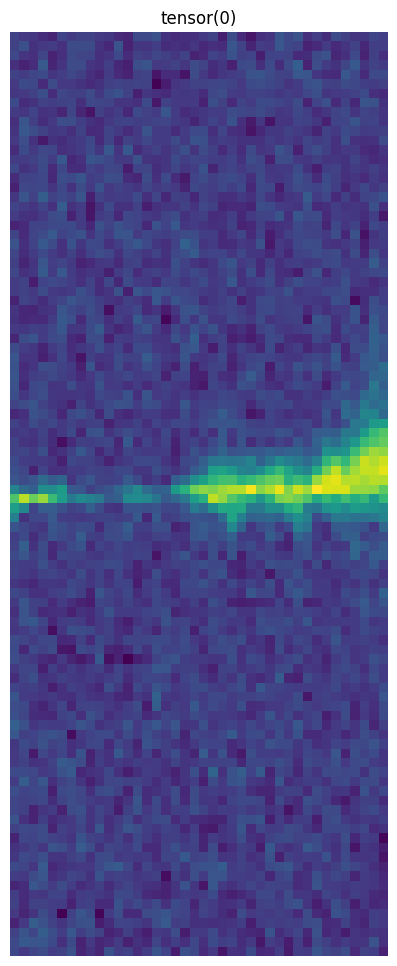

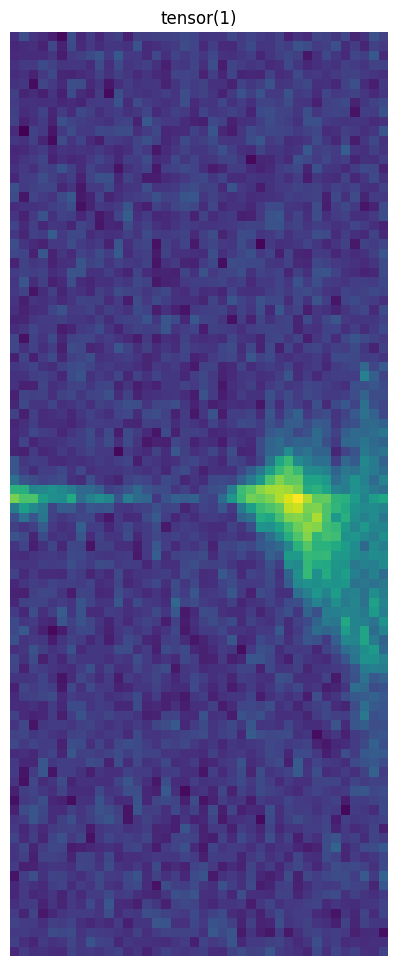

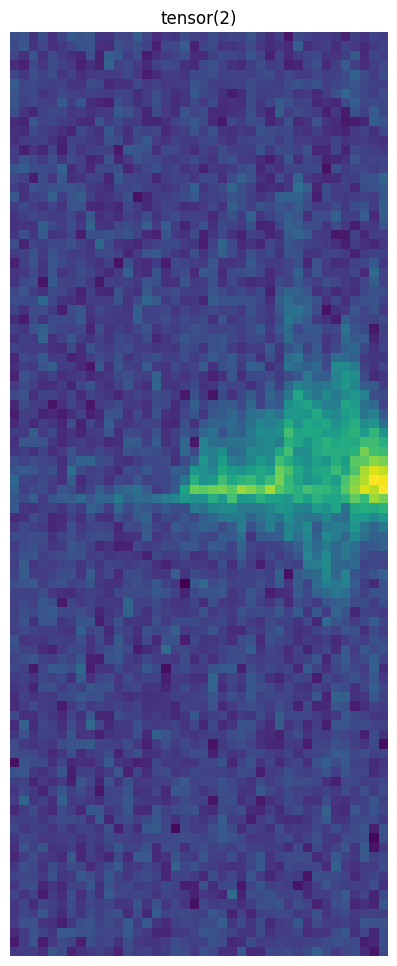

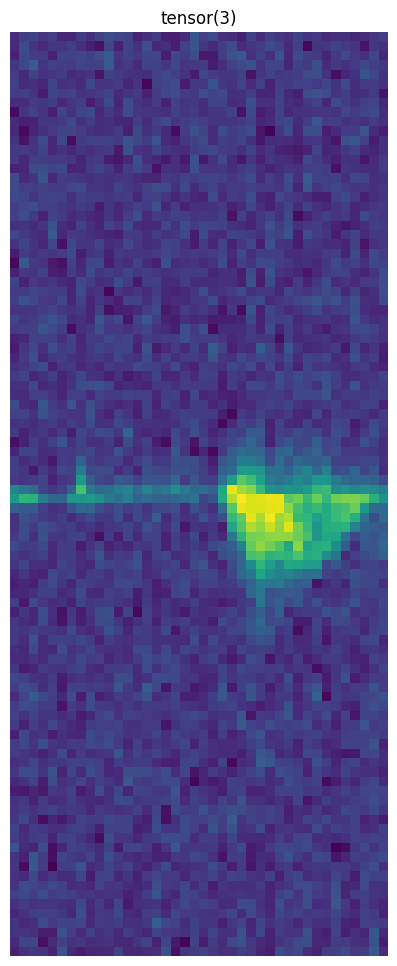

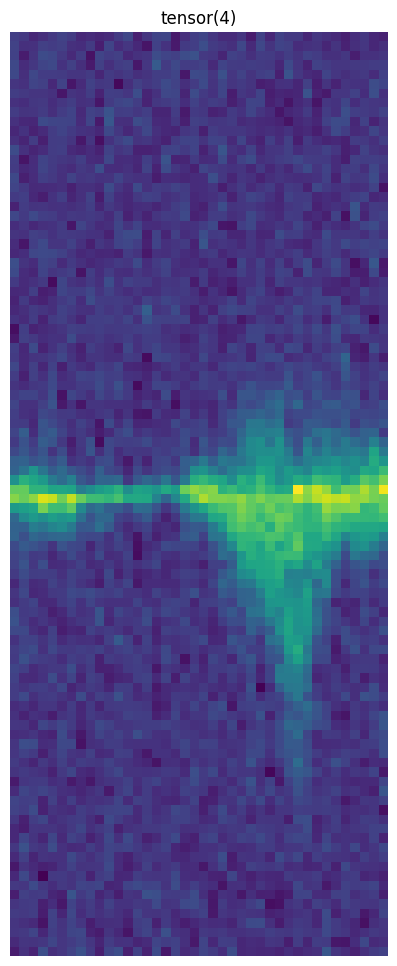

3476 986 2464 1506 2940
9098 2274 9098 2274


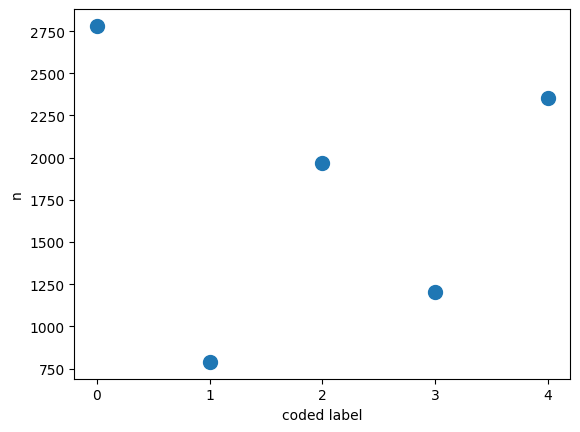

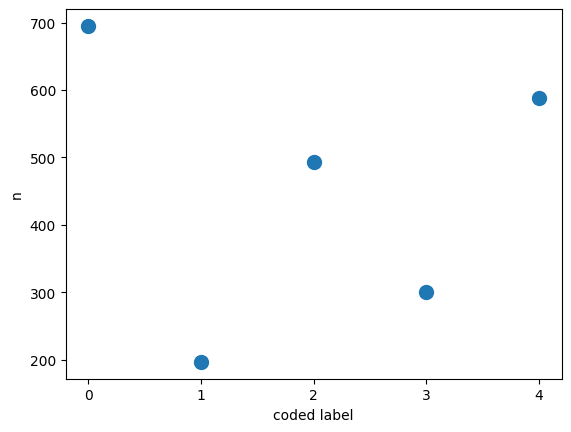

In [18]:
names = ['walk to room'      , 'fall on floor of room' , 'stand up from floor of room', 'walk to chair'   ,
         'sit down on chair' , 'stand up from chair'   , 'walk to bed'                , 'sit down on bed' ,
         'stand up from bed' , 'get in bed'            , 'lie in bed'                 , 'roll in bed'      ,
         'sit in bed'        , 'get out bed']

# Walk class
lab_new0 = torch.empty((a+d+g) , dtype = int)
img_new0 = torch.empty((a+d+g,1,98,40))

# Fall class
lab_new1 = torch.empty((b) , dtype = int)
img_new1 = torch.empty((b,1,98,40))

# Stand up class
lab_new2 = torch.empty((c+f+j) , dtype = int)
img_new2 = torch.empty((c+f+j,1,98,40))

# Sit down class
lab_new3 = torch.empty((e+h) , dtype = int)
img_new3 = torch.empty((e+h,1,98,40))

# Bed activities
lab_new4 = torch.empty((k+l+m+n+o) , dtype = int)
img_new4 = torch.empty((k+l+m+n+o,1,98,40))

for i in range(len(lab_new0)):
    lab_new0[i] = 0
for i in range(len(lab_new1)):
    lab_new1[i] = 1
for i in range(len(lab_new2)):
    lab_new2[i] = 2
for i in range(len(lab_new3)):
    lab_new3[i] = 3
for i in range(len(lab_new4)):
    lab_new4[i] = 4
    
print(len(lab_new0) , len(lab_new1) , len(lab_new2) , len(lab_new3) , len(lab_new4))

i = 0
A , B , C , D , E = 0 , 0 , 0 , 0 , 0
while i < len(train_lab):
    
    if train_lab[i].item() == 0 or train_lab[i].item() == 3 or train_lab[i].item() == 6:
        img_new0[A] = train_img[i,0,:,:]
        A += 1
        
    elif train_lab[i].item() == 1:
        img_new1[B] = train_img[i,0,:,:]
        B += 1

    elif train_lab[i].item() == 2 or train_lab[i].item() == 5 or train_lab[i].item() == 8:
        img_new2[C] = train_img[i,0,:,:]
        C += 1
        
    elif train_lab[i].item() == 4 or train_lab[i].item() == 7:
        img_new3[D] = train_img[i,0,:,:]
        D += 1
            
    else:
        img_new4[E] = train_img[i,0,:,:]
        E += 1
        
    i += 1

print(len(img_new0) , len(img_new1) , len(img_new2), len(img_new3) , len(img_new4))

Lun = len(img_new0) + len(img_new1) + len(img_new2) + len(img_new3) + len(img_new4)

LunTR = int(Lun*0.8)
LunTE = int(Lun*0.2)

Images_training , Labels_training , Images_testing , Labels_testing = [] , [] , [] , []

A1,A2 = nit(A)
B1,B2 = nit(B)
C1,C2 = nit(C)
D1,D2 = nit(D)
E1,E2 = nit(E)

Images_training.append(img_new0[A2:A,:,:,:])
Images_testing.append(img_new0[0:A2,:,:,:])
Labels_training.append(lab_new0[A2:A])
Labels_testing.append(lab_new0[0:A2])

Images_training.append(img_new1[B2:B,:,:,:])
Images_testing.append(img_new1[0:B2,:,:,:])
Labels_training.append(lab_new1[B2:B])
Labels_testing.append(lab_new1[0:B2])

Images_training.append(img_new2[C2:C,:,:,:])
Images_testing.append(img_new2[0:C2,:,:,:])
Labels_training.append(lab_new2[C2:C])
Labels_testing.append(lab_new2[0:C2])

Images_training.append(img_new3[D2:D,:,:,:])
Images_testing.append(img_new3[0:D2,:,:,:])
Labels_training.append(lab_new3[D2:D])
Labels_testing.append(lab_new3[0:D2])

Images_training.append(img_new4[E2:E,:,:,:])
Images_testing.append(img_new4[0:E2,:,:,:])
Labels_training.append(lab_new4[E2:E])
Labels_testing.append(lab_new4[0:E2])

Img_TRAIN = torch.cat((Images_training[0] , Images_training[1] , Images_training[2] , Images_training[3] , Images_training[4]) , 0)
Img_TEST = torch.cat((Images_testing[0] , Images_testing[1] , Images_testing[2] , Images_testing[3] , Images_testing[4]) , 0)
Lab_TRAIN = torch.cat((Labels_training[0] , Labels_training[1] , Labels_training[2] , Labels_training[3] , Labels_training[4]) , 0)
Lab_TEST = torch.cat((Labels_testing[0] , Labels_testing[1] , Labels_testing[2] , Labels_testing[3] , Labels_testing[4]) , 0)

print(len(Img_TRAIN) , len(Img_TEST) , len(Lab_TRAIN) , len(Lab_TEST))

plt.plot( torch.bincount(Lab_TRAIN).numpy() , 'o' , markersize = 10)
plt.xticks([0,1,2,3,4])
plt.xlabel('coded label')
plt.ylabel('n')
plt.show()
plt.plot( torch.bincount(Lab_TEST).numpy() , 'o' , markersize = 10)
plt.xticks([0,1,2,3,4])
plt.xlabel('coded label')
plt.ylabel('n')
plt.show()

find_zero(Img_TRAIN)

find_zero(Img_TEST)

In [183]:
torch.save(Lab_TRAIN , 'train_lab_stand0.t')
torch.save(Img_TRAIN , 'train_img_stand0.t')
torch.save(Lab_TEST , 'test_lab_stand0.t')
torch.save(Img_TEST , 'test_img_stand0.t')

# Creating a "bed" dataset and dividing it in train and test

640 574 552 564 610


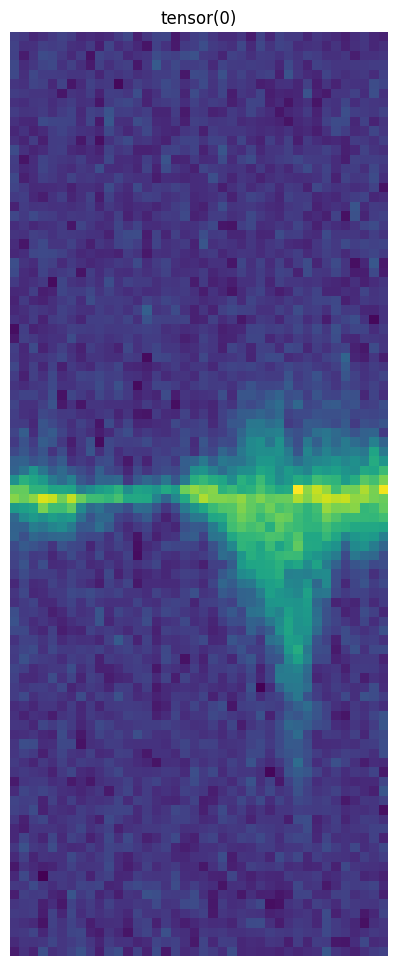

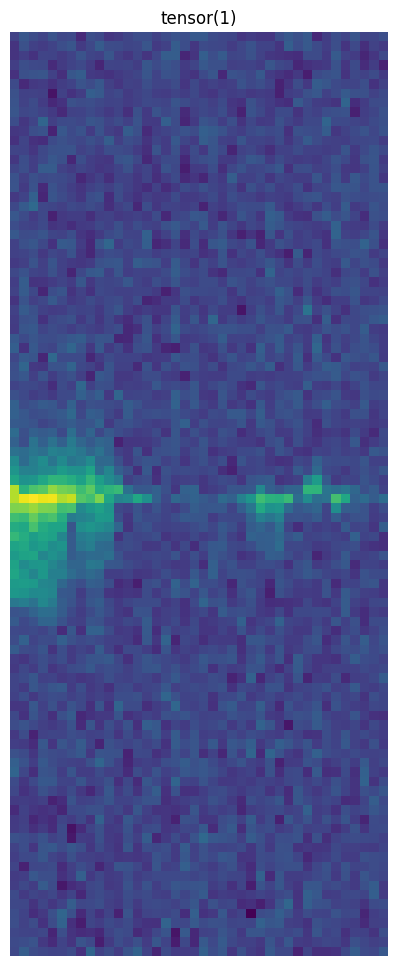

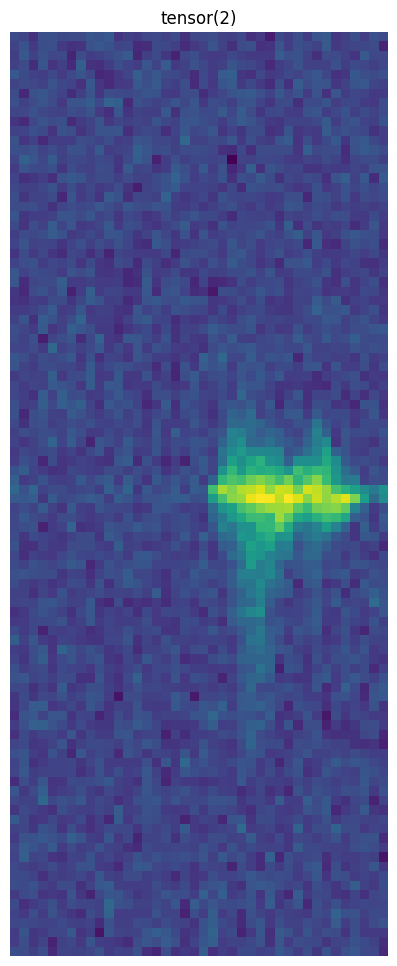

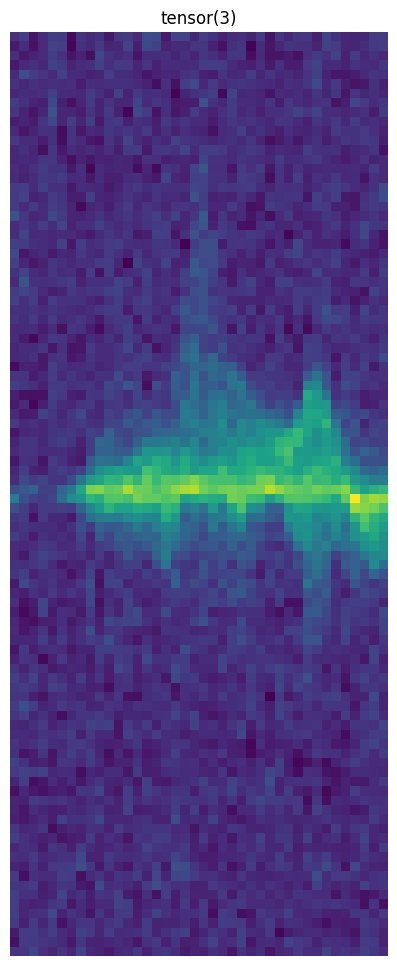

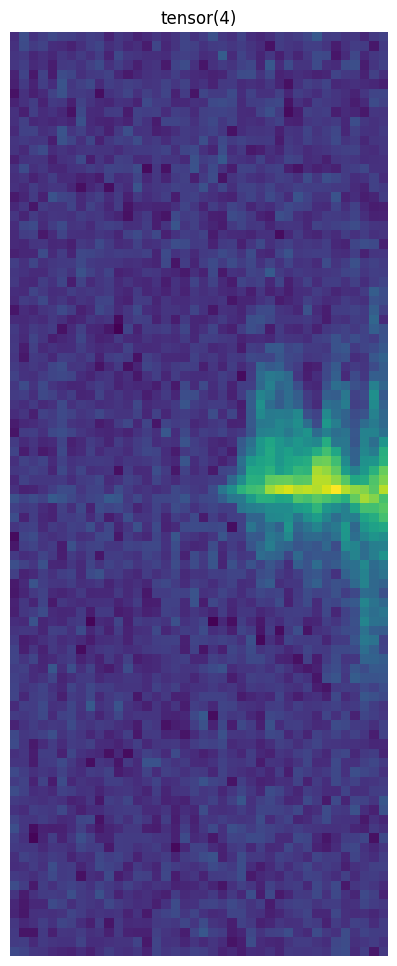

640 574 552 564 610
2352 588 2352 588


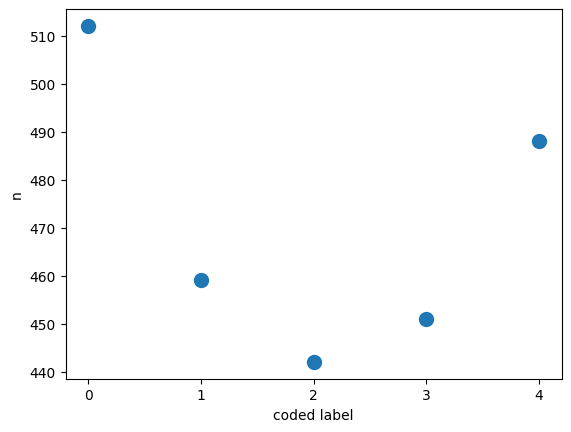

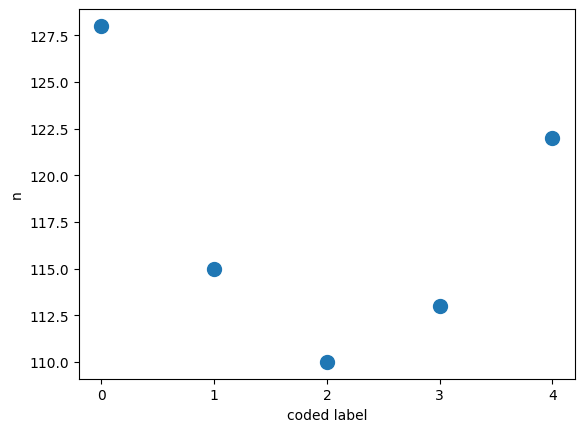

In [19]:
names = ['walk to room'      , 'fall on floor of room' , 'stand up from floor of room', 'walk to chair'   ,
         'sit down on chair' , 'stand up from chair'   , 'walk to bed'                , 'sit down on bed' ,
         'stand up from bed' , 'get in bed'            , 'lie in bed'                 , 'roll in bed'      ,
         'sit in bed'        , 'get out bed']

# Get in bed
lab_new_bed0 = torch.empty((k) , dtype = int)
img_new_bed0 = torch.empty((k,1,98,40))

# Lie in bed
lab_new_bed1 = torch.empty((l) , dtype = int)
img_new_bed1 = torch.empty((l,1,98,40))

# Roll in bed
lab_new_bed2 = torch.empty((m) , dtype = int)
img_new_bed2 = torch.empty((m,1,98,40))

# Sit in bed
lab_new_bed3 = torch.empty((n) , dtype = int)
img_new_bed3 = torch.empty((n,1,98,40))

# Get out of bed
lab_new_bed4 = torch.empty((o) , dtype = int)
img_new_bed4 = torch.empty((o,1,98,40))

for i in range(len(lab_new_bed0)):
    lab_new_bed0[i] = 0
for i in range(len(lab_new_bed1)):
    lab_new_bed1[i] = 1
for i in range(len(lab_new_bed2)):
    lab_new_bed2[i] = 2
for i in range(len(lab_new_bed3)):
    lab_new_bed3[i] = 3
for i in range(len(lab_new_bed4)):
    lab_new_bed4[i] = 4
    
print(len(lab_new_bed0) , len(lab_new_bed1) , len(lab_new_bed2) , len(lab_new_bed3) , len(lab_new_bed4) )#, len(lab_new_bed5))

i = 0
A , B , C , D , E , F = 0 , 0 , 0 , 0 , 0 , 0
while i < len(train_lab):
    
    if train_lab[i].item() == 9:
        img_new_bed0[A] = train_img[i,0,:,:]
        A += 1
        if A == 1:
            plt.figure(figsize = [5,12])
            plt.axis('off')
            plt.imshow(img_new_bed0[A-1,0,:,:])
            plt.title(lab_new_bed0[A-1])
            plt.savefig('bed_img_class0.png')
            plt.show()
        
    elif train_lab[i].item() == 10:
        img_new_bed1[B] = train_img[i,0,:,:]
        B += 1
        if B == 1:
            plt.figure(figsize = [5,12])
            plt.axis('off')
            plt.imshow(img_new_bed1[B-1,0,:,:])
            plt.title(lab_new_bed1[B-1])
            plt.savefig('bed_img_class1.png')
            plt.show()

    elif train_lab[i].item() == 11:
        img_new_bed2[C] = train_img[i,0,:,:]
        C += 1
        if C == 1:
            plt.figure(figsize = [5,12])
            plt.axis('off')
            plt.imshow(img_new_bed2[C-1,0,:,:])
            plt.title(lab_new_bed2[C-1])
            plt.savefig('bed_img_class2.png')
            plt.show()
        
    elif train_lab[i].item() == 12:
        img_new_bed3[D] = train_img[i,0,:,:]
        D += 1
        if D == 1:
            plt.figure(figsize = [5,12])
            plt.axis('off')
            plt.imshow(img_new_bed3[D-1,0,:,:])
            plt.title(lab_new_bed3[D-1])
            plt.savefig('bed_img_class3.png')
            plt.show()
        
    elif train_lab[i].item() == 13:
        img_new_bed4[E] = train_img[i,0,:,:]
        E += 1
        if E == 1:
            plt.figure(figsize = [5,12])
            plt.axis('off')
            plt.imshow(img_new_bed4[E-1,0,:,:])
            plt.title(lab_new_bed4[E-1])
            plt.savefig('bed_img_class4.png')
            plt.show()
        
    i += 1

print(len(img_new_bed0) , len(img_new_bed1) , len(img_new_bed2), len(img_new_bed3) , len(img_new_bed4) )#, len(img_new_bed5))

Images_training_bed , Labels_training_bed , Images_testing_bed , Labels_testing_bed = [] , [] , [] , []

A1,A2 = nit(A)
B1,B2 = nit(B)
C1,C2 = nit(C)
D1,D2 = nit(D)
E1,E2 = nit(E)

Images_training_bed.append(img_new_bed0[A2:A,:,:,:])
Images_testing_bed.append(img_new_bed0[0:A2,:,:,:])
Labels_training_bed.append(lab_new_bed0[A2:A])
Labels_testing_bed.append(lab_new_bed0[0:A2])

Images_training_bed.append(img_new_bed1[B2:B,:,:,:])
Images_testing_bed.append(img_new_bed1[0:B2,:,:,:])
Labels_training_bed.append(lab_new_bed1[B2:B])
Labels_testing_bed.append(lab_new_bed1[0:B2])

Images_training_bed.append(img_new_bed2[C2:C,:,:,:])
Images_testing_bed.append(img_new_bed2[0:C2,:,:,:])
Labels_training_bed.append(lab_new_bed2[C2:C])
Labels_testing_bed.append(lab_new_bed2[0:C2])

Images_training_bed.append(img_new_bed3[D2:D,:,:,:])
Images_testing_bed.append(img_new_bed3[0:D2,:,:,:])
Labels_training_bed.append(lab_new_bed3[D2:D])
Labels_testing_bed.append(lab_new_bed3[0:D2])

Images_training_bed.append(img_new_bed4[E2:E,:,:,:])
Images_testing_bed.append(img_new_bed4[0:E2,:,:,:])
Labels_training_bed.append(lab_new_bed4[E2:E])
Labels_testing_bed.append(lab_new_bed4[0:E2])

ImgB_TRAIN = torch.cat((Images_training_bed[0] , Images_training_bed[1] , Images_training_bed[2] , Images_training_bed[3] , Images_training_bed[4]) , 0)
ImgB_TEST = torch.cat((Images_testing_bed[0] , Images_testing_bed[1] , Images_testing_bed[2] , Images_testing_bed[3] , Images_testing_bed[4]) , 0)
LabB_TRAIN = torch.cat((Labels_training_bed[0] , Labels_training_bed[1] , Labels_training_bed[2] , Labels_training_bed[3] , Labels_training_bed[4]) , 0)
LabB_TEST = torch.cat((Labels_testing_bed[0] , Labels_testing_bed[1] , Labels_testing_bed[2] , Labels_testing_bed[3] , Labels_testing_bed[4]) , 0)

print(len(ImgB_TRAIN) , len(ImgB_TEST) , len(LabB_TRAIN) , len(LabB_TEST))

plt.plot( torch.bincount(LabB_TRAIN).numpy() , 'o' , markersize = 10)
plt.xticks([0,1,2,3,4])
plt.xlabel('coded label')
plt.ylabel('n')
plt.show()
plt.plot( torch.bincount(LabB_TEST).numpy() , 'o' , markersize = 10)
plt.xticks([0,1,2,3,4])
plt.xlabel('coded label')
plt.ylabel('n')
plt.show()

find_zero(ImgB_TRAIN)

find_zero(ImgB_TEST)

In [185]:
torch.save(LabB_TRAIN , 'train_lab_bed0.t')
torch.save(ImgB_TRAIN , 'train_img_bed0.t')
torch.save(LabB_TEST , 'test_lab_bed0.t')
torch.save(ImgB_TEST , 'test_img_bed0.t')